In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('online_retail_II.csv')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### 데이터 전처리

In [13]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['TotalPrice'] = df['Quantity'] * df['Price']

### 일별 매출

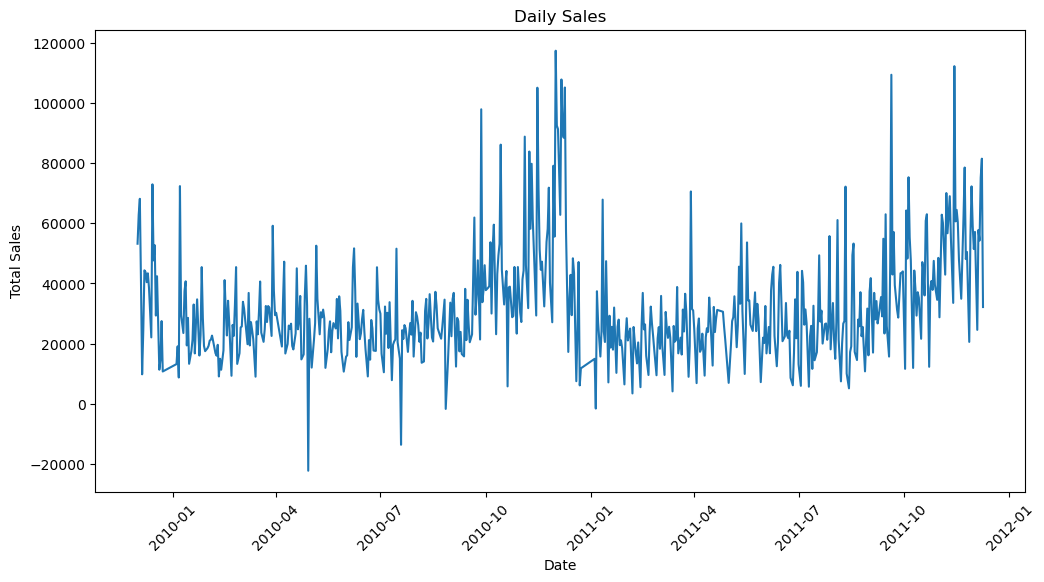

In [5]:
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum()

plt.figure(figsize=(12,6))
sns.lineplot(x=daily_sales.index, y=daily_sales.values)
plt.title("Daily Sales")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

### 월별 매출

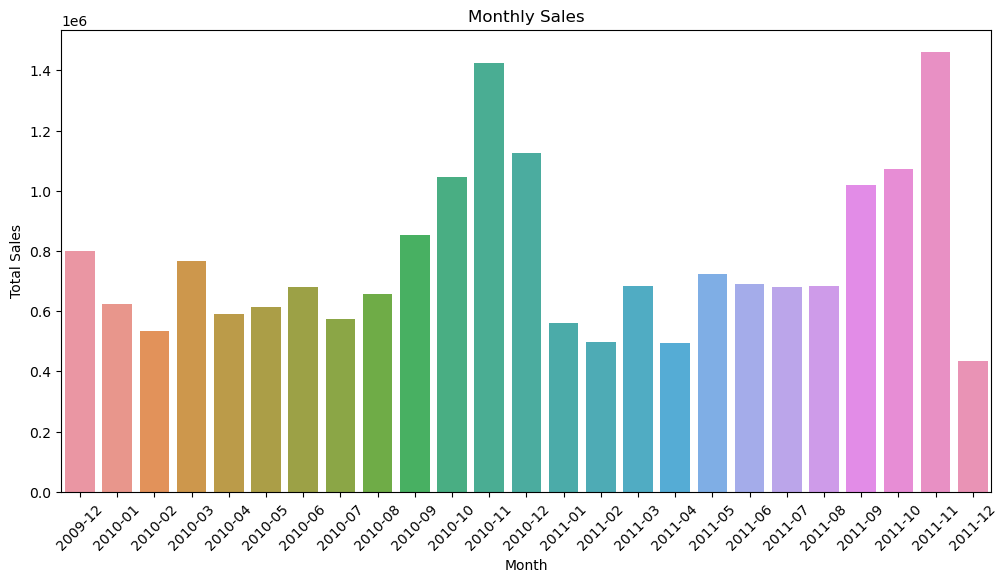

In [6]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum()

plt.figure(figsize=(12,6))
sns.barplot(x=monthly_sales.index.astype(str), y=monthly_sales.values)
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

### 단가와 판매량 관계 분석

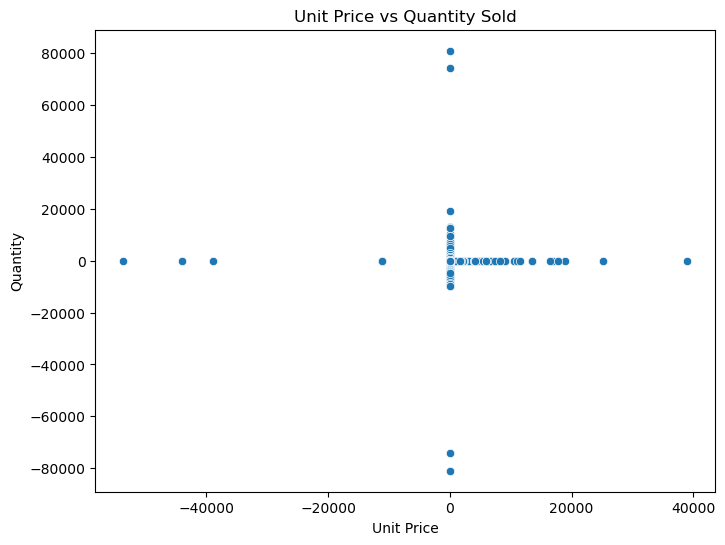

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Price'], y=df['Quantity'])
plt.title("Unit Price vs Quantity Sold")
plt.xlabel("Unit Price")
plt.ylabel("Quantity")
plt.show()

### 국가별 매출

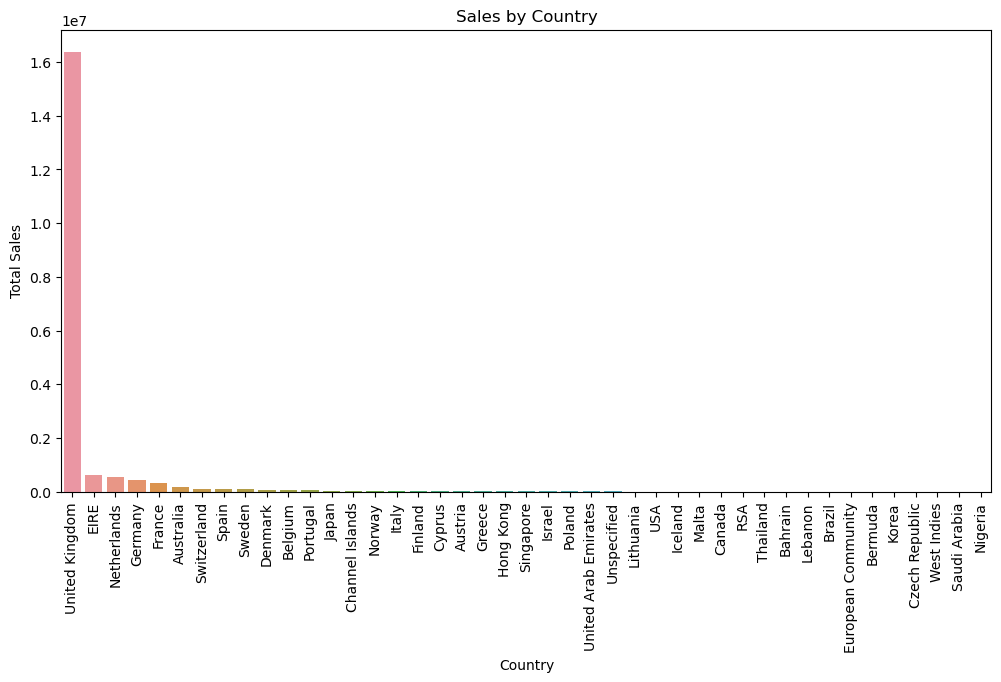

In [12]:
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=country_sales.index, y=country_sales.values)
plt.title("Sales by Country")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.show()

### MAU 분석

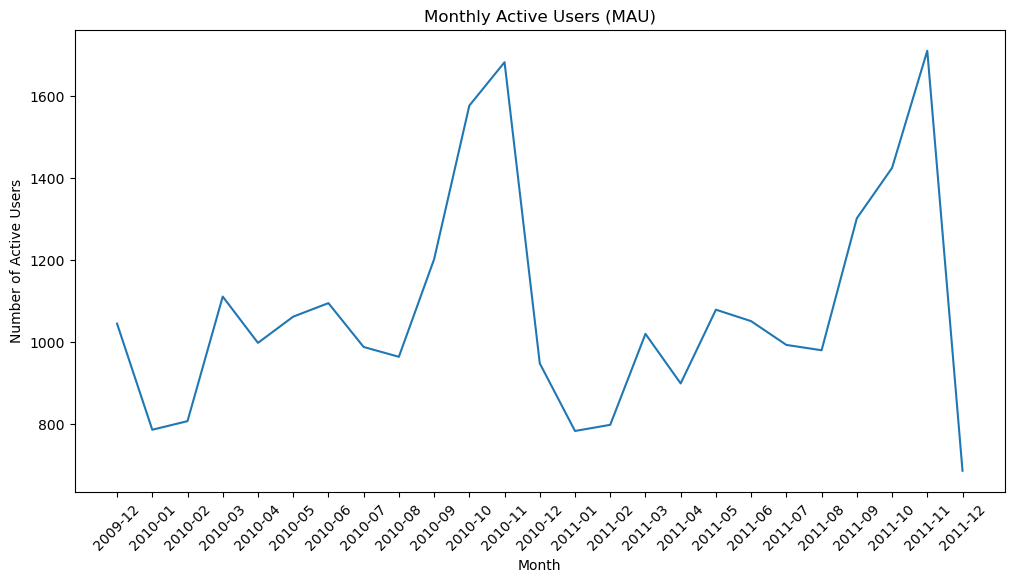

In [9]:
mau = df.groupby(['Customer ID', 'InvoiceMonth']).size().reset_index(name='Purchases')

# 월별 고유 고객 수 (MAU)
monthly_mau = mau.groupby('InvoiceMonth')['Customer ID'].nunique()

# 시각화
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_mau.index.astype(str), y=monthly_mau.values)
plt.title("Monthly Active Users (MAU)")
plt.xlabel("Month")
plt.ylabel("Number of Active Users")
plt.xticks(rotation=45)
plt.show()